<a href="https://colab.research.google.com/github/FaldoFajri/loan-approval-prediction-app/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final-Project-Bootcamp-DS/Credit_Scoring_Dataset.csv")
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

# Business & Data Understanding

**Business Problem**

Perusahaan Fintech menghadapi risiko tinggi ketika menyetujui pengajuan pinjaman, karena ada kemungkinan nasabah tidak mampu membayar kembali pinjamannya. Jika perusahaan salah memilih nasabah, hal ini bisa menyebabkan kerugian finansial yang besar.


**Objective**

Membangun model prediksi untuk membantu perusahaan memutuskan apakah pengajuan pinjaman dari seorang nasabah sebaiknya diterima atau ditolak berdasarkan profil keuangan dan riwayat kreditnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Statistik deskriptif variabel numerik, dengan mengecualikan kolom identifikasi loan_id

In [ ]:
df.describe().T

count          mean           std       min  \
loan_id                    4269.0  2.135000e+03  1.232498e+03       1.0   
 no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
 income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
 loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
 loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
 cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
 residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
 commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
 luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
 bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                 25%         50%         75%         max  
loan_id                       1068.0      2135.0      3202.0      4269.0  
 no_of_dependents                1.0         3.0         4.0         5.0  
 income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
 loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
 loan_term                       6.0        10.0        16.0        20.0  
 cibil_score                   453.0       600.0       748.0       900.0  
 residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
 commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
 luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
 bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

# Data Cleansing

In [ ]:
print(df.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


Menunjukkan daftar semua nama kolom DataFrame yang masih memiliki spasi di awal, kemudian dilakukan pembersihan dengan str.strip() agar semua nama kolom rapi tanpa spasi berlebih.

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


Handle missing data


In [ ]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Handle data outlier


In [ ]:
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns
print(num_cols)

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


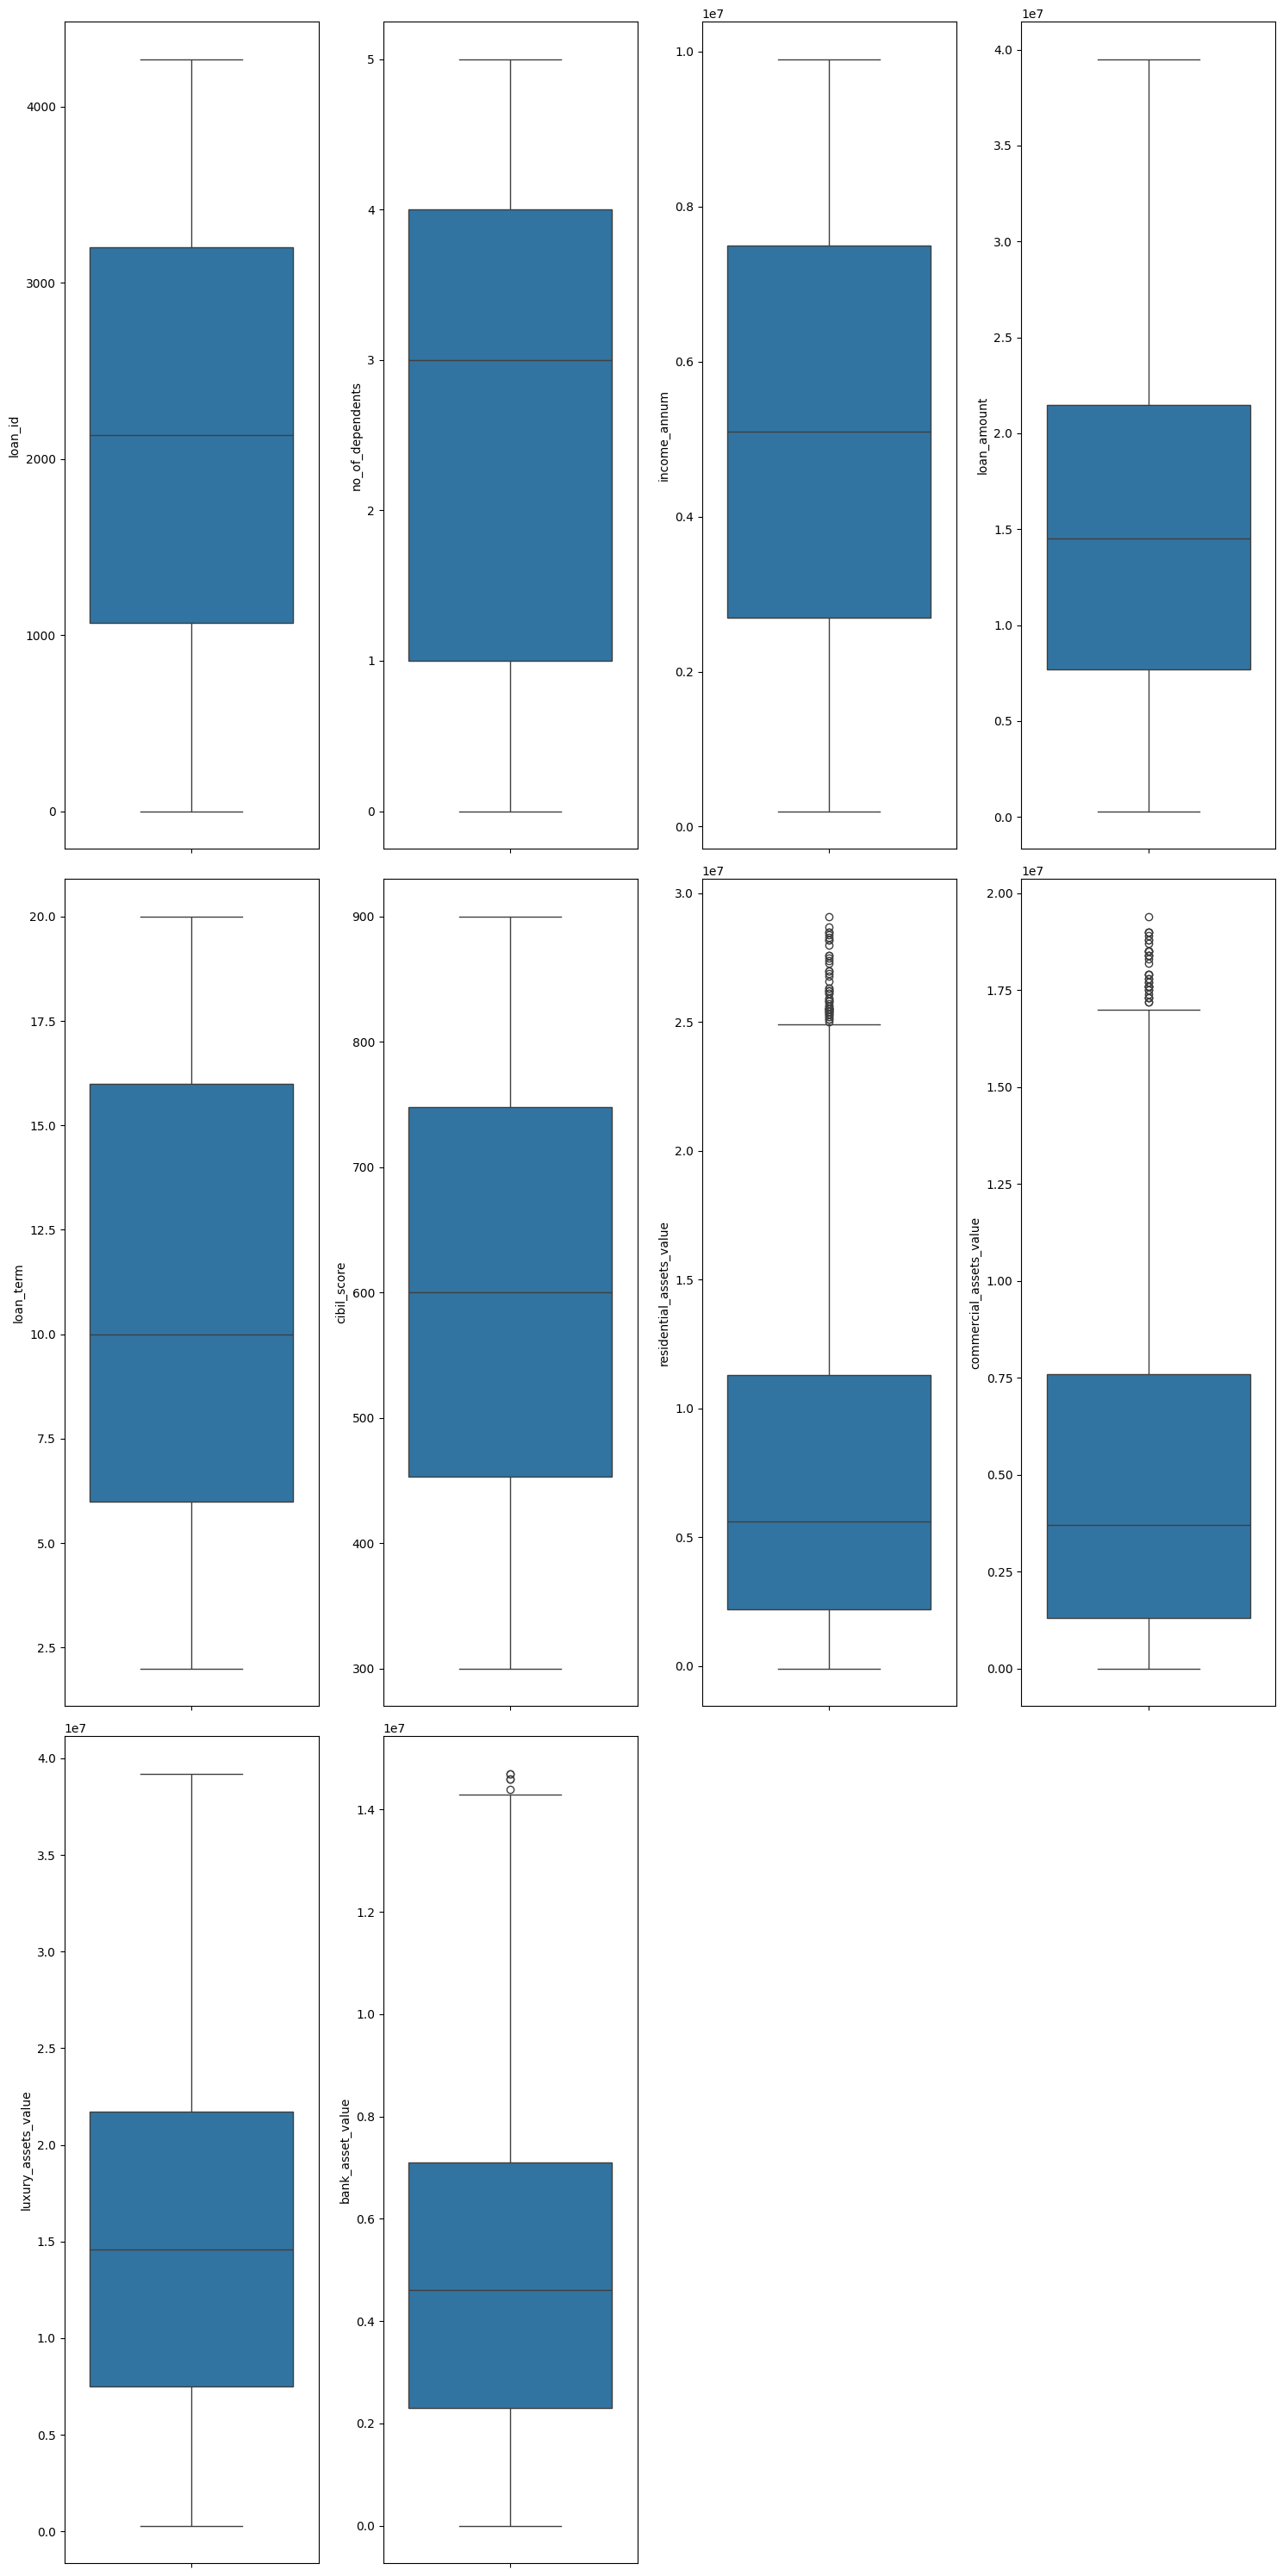

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,30))
for i in range(len(num_cols)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.tight_layout()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print(outliers.sum())

loan_id                      0
no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    52
commercial_assets_value     37
luxury_assets_value          0
bank_asset_value             5
dtype: int64


Outlier pada dataset ini tidak akan dihapus karena dapat merepresentasikan nasabah dengan aset sangat besar yang justru penting untuk dianalisis. Jumlah outlier yang terdeteksi yaitu :

- **52 pada residential\_assets\_value**
- **37 pada commercial\_assets\_value**
- **5 pada bank\_asset\_value**.

Tetapi Pada kolom `residential_assets_value`, nilai minimum tercatat -100 Ribu, yang tidak masuk akal karena aset tempat tinggal tidak mungkin bernilai negatif. Nilai ini dianggap sebagai outlier, sehingga pada tahap data cleansing akan dihapus agar tidak memengaruhi kualitas hasil model.

In [ ]:
(df['residential_assets_value']<0).sum()

np.int64(28)

Pada kolom `residential_assets_value` terdapat 28 data bernilai negatif. Karena nilai tersebut tidak logis, data tersebut akan dihapus dari dataset.

In [ ]:
# dataset hanya memakai kolom dengan nilai residential_assets_value >= 0
df = df[df['residential_assets_value'] >= 0]
df.describe().T

count          mean           std       min  \
loan_id                   4241.0  2.134503e+03  1.231650e+03       1.0   
no_of_dependents          4241.0  2.497996e+00  1.695599e+00       0.0   
income_annum              4241.0  5.074251e+06  2.803166e+06  200000.0   
loan_amount               4241.0  1.517840e+07  9.034490e+06  300000.0   
loan_term                 4241.0  1.090215e+01  5.708988e+00       2.0   
cibil_score               4241.0  5.996857e+02  1.722773e+02     300.0   
residential_assets_value  4241.0  7.522613e+06  6.495800e+06       0.0   
commercial_assets_value   4241.0  4.985121e+06  4.391504e+06       0.0   
luxury_assets_value       4241.0  1.517121e+07  9.094717e+06  300000.0   
bank_asset_value          4241.0  4.991488e+06  3.249494e+06       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2137.0      3201.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14600000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       747.0       900.0  
residential_assets_value  2200000.0   5700000.0  11400000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7700000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2400000.0   4600000.0   7100000.0  14700000.0

Cek Duplikat Data

In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA (Exploratory Data Analysysys)

### Univariate Analysis

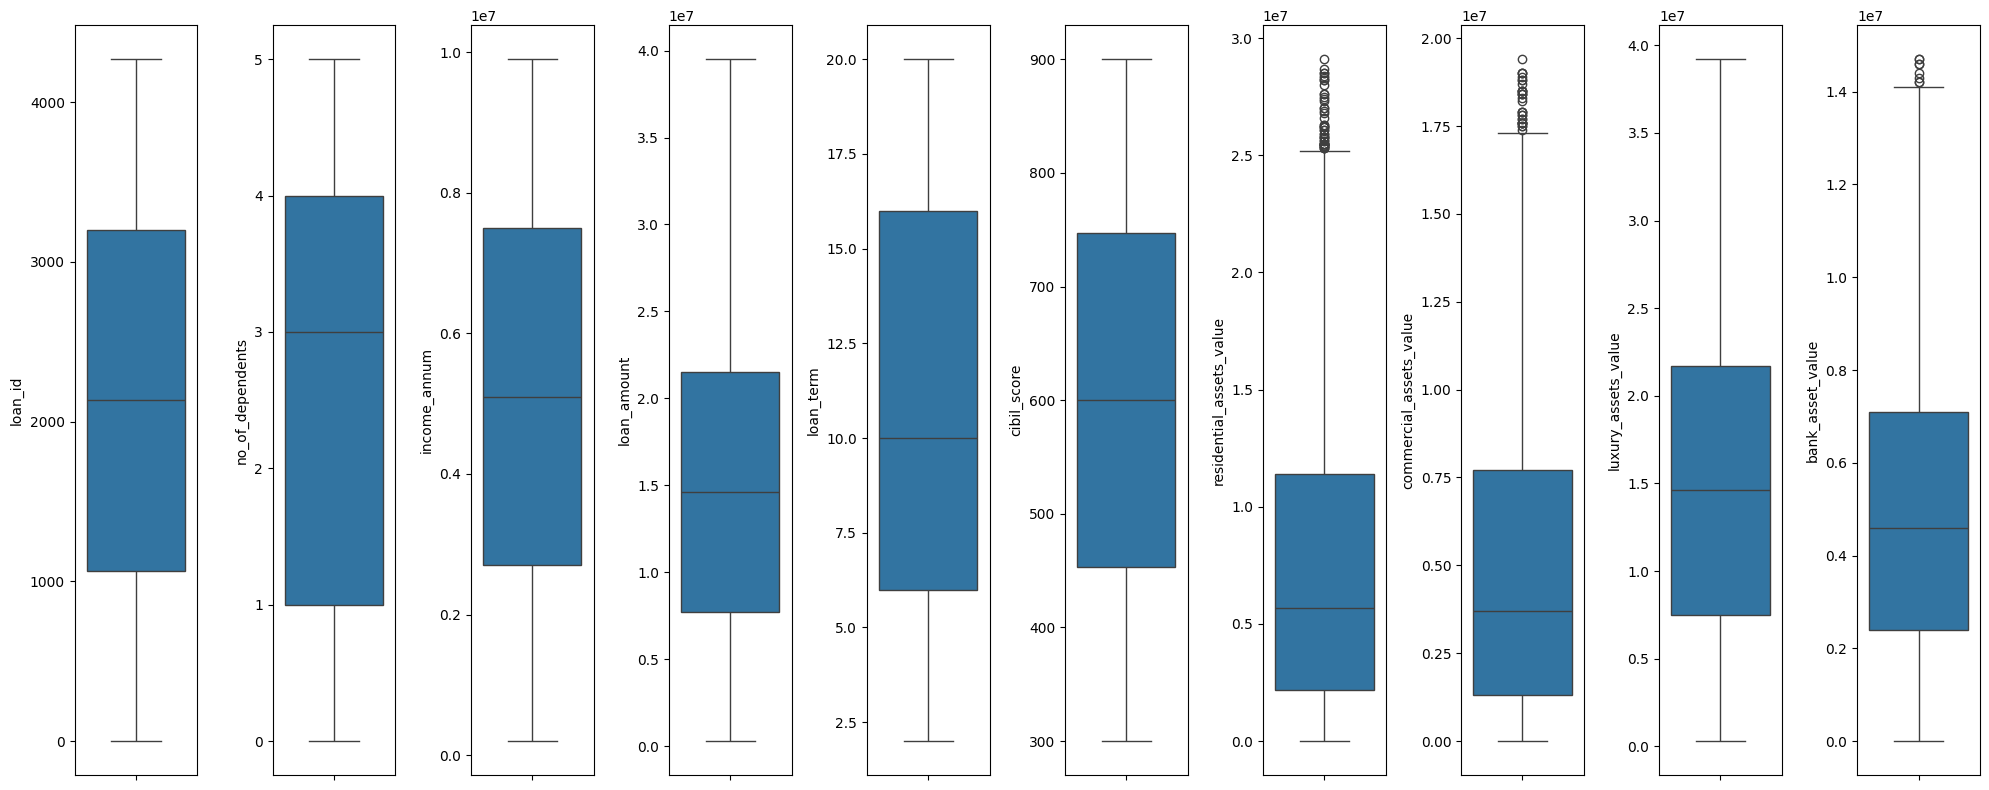

In [ ]:
# Boxplot

plt.figure(figsize = (20,8))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(df[num_cols[i]], orient = "v")
    plt.tight_layout()

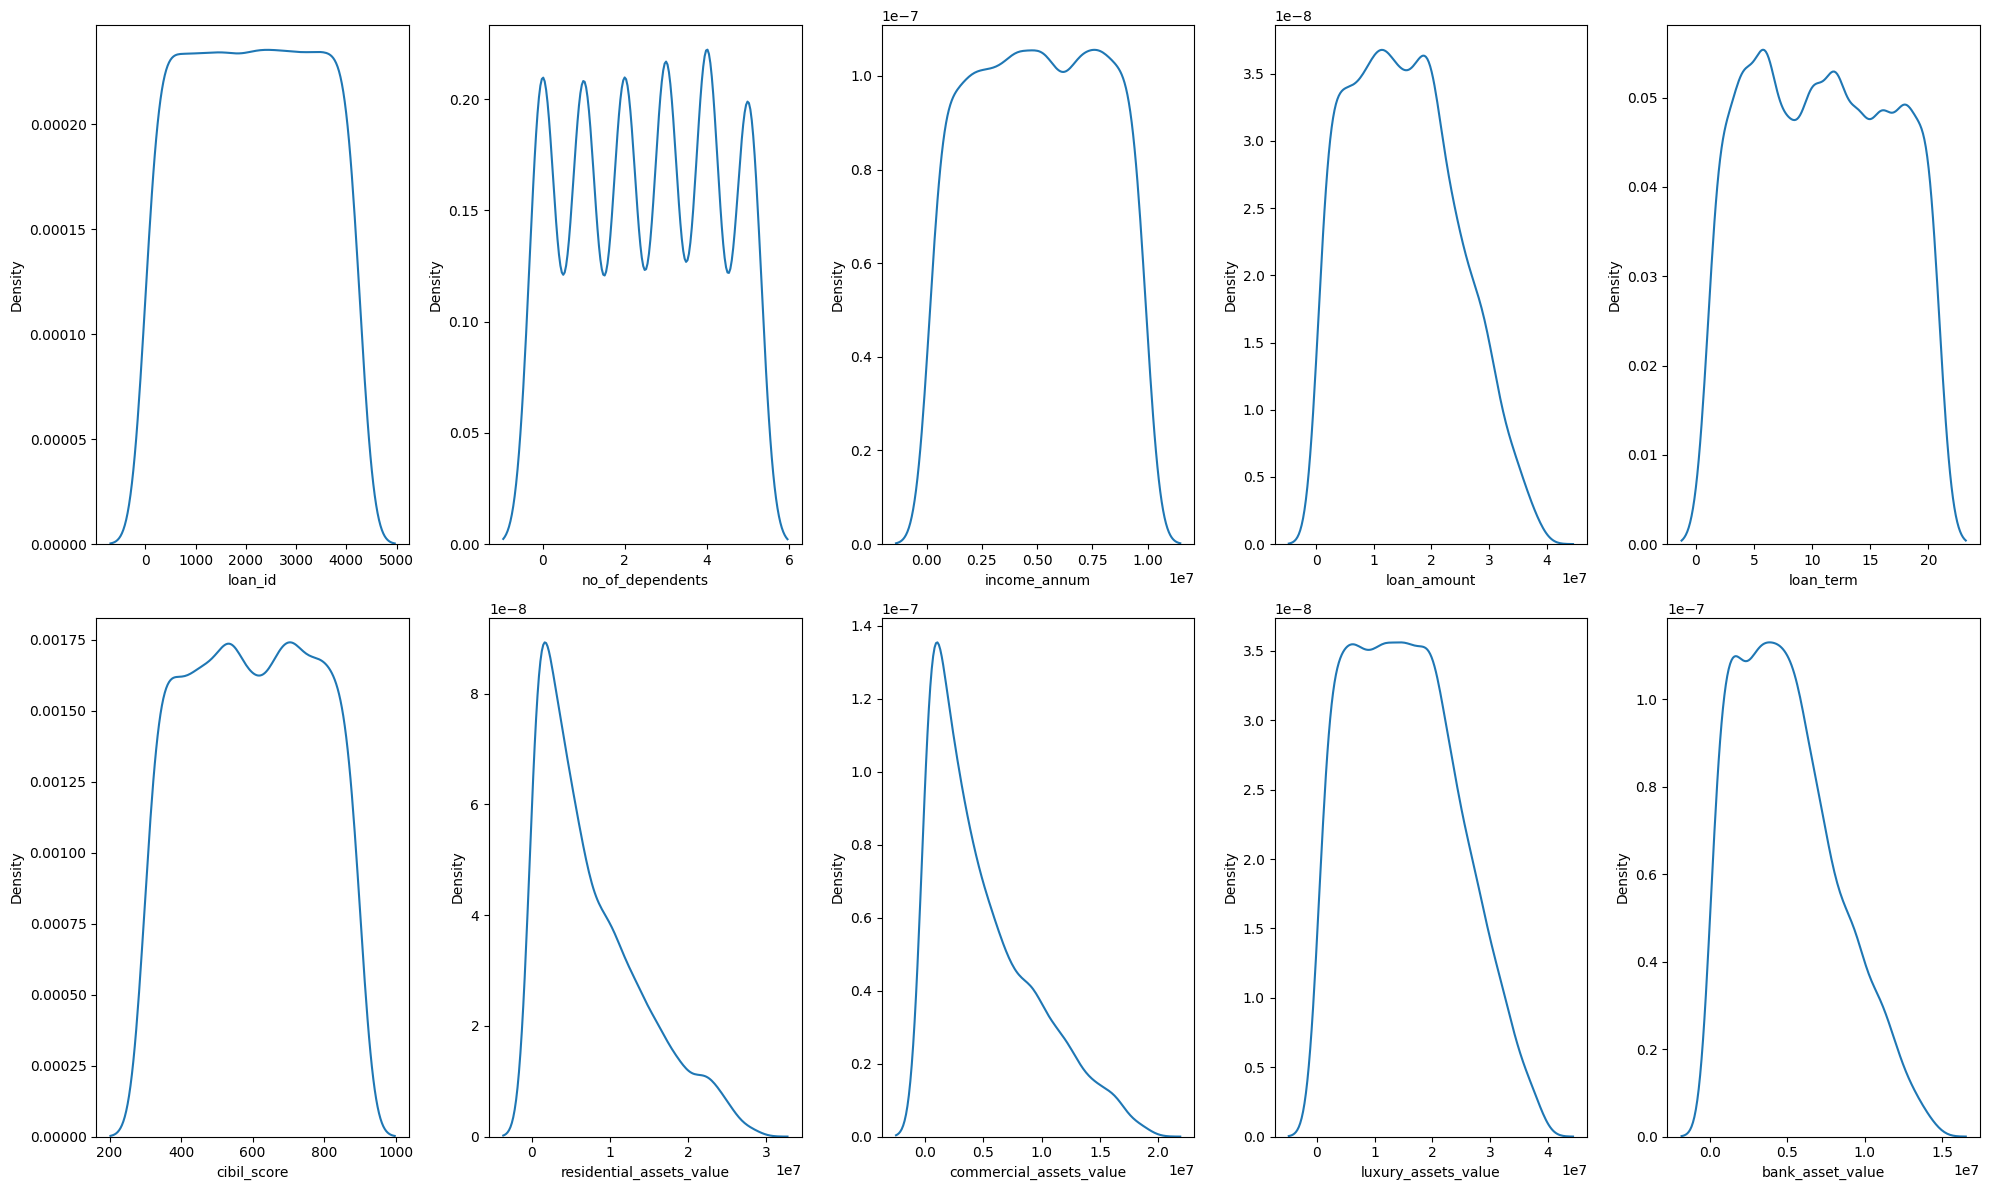

In [ ]:
# distplot

plt.figure(figsize = (20,12))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1) # Changed from 2,4 to 2,5
    sns.kdeplot(df[num_cols[i]])
    plt.tight_layout()

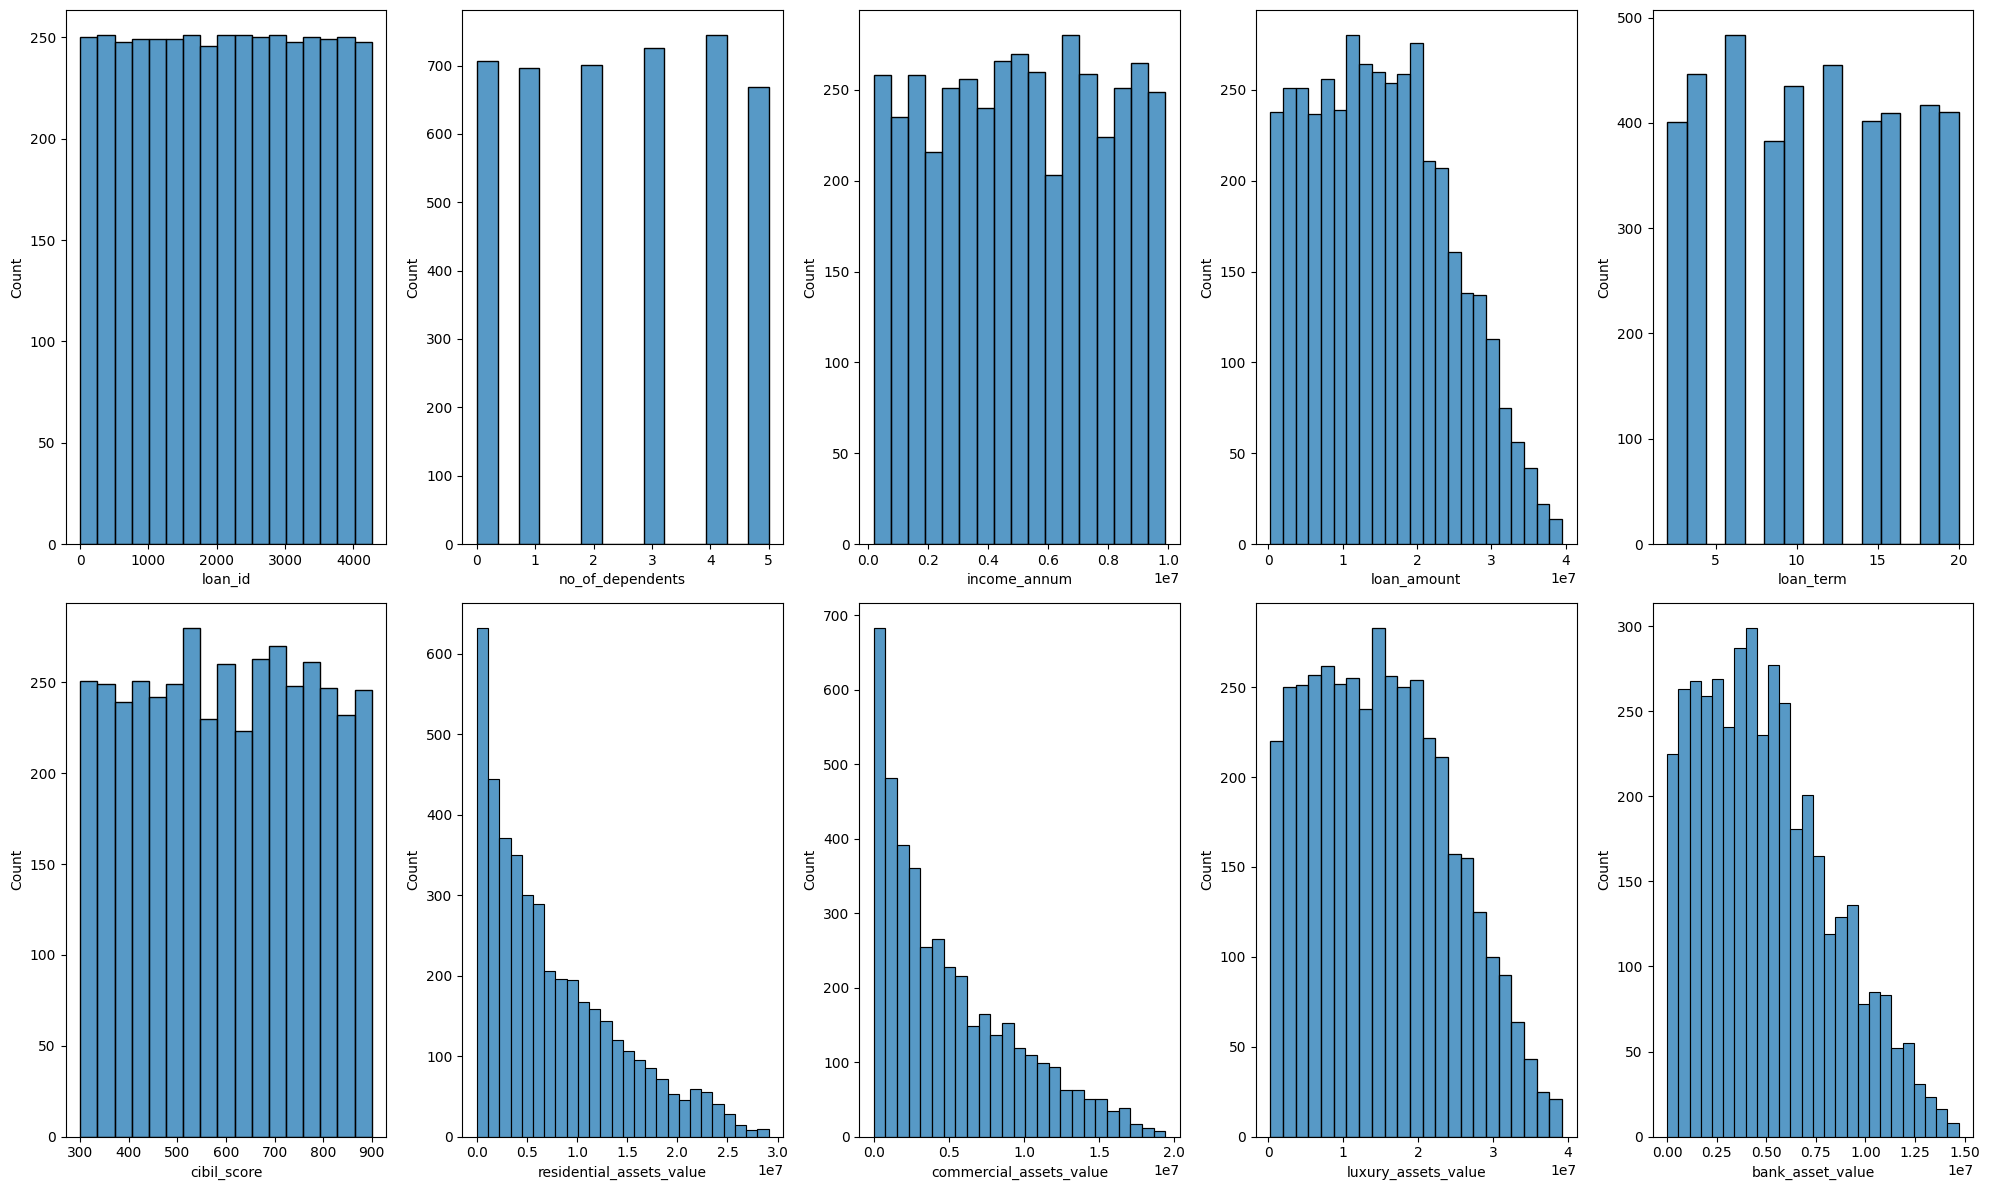

In [ ]:
# histogram

plt.figure(figsize = (20,12))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1)
    sns.histplot(df[num_cols[i]])
    plt.tight_layout()

### Multivariate Analysis

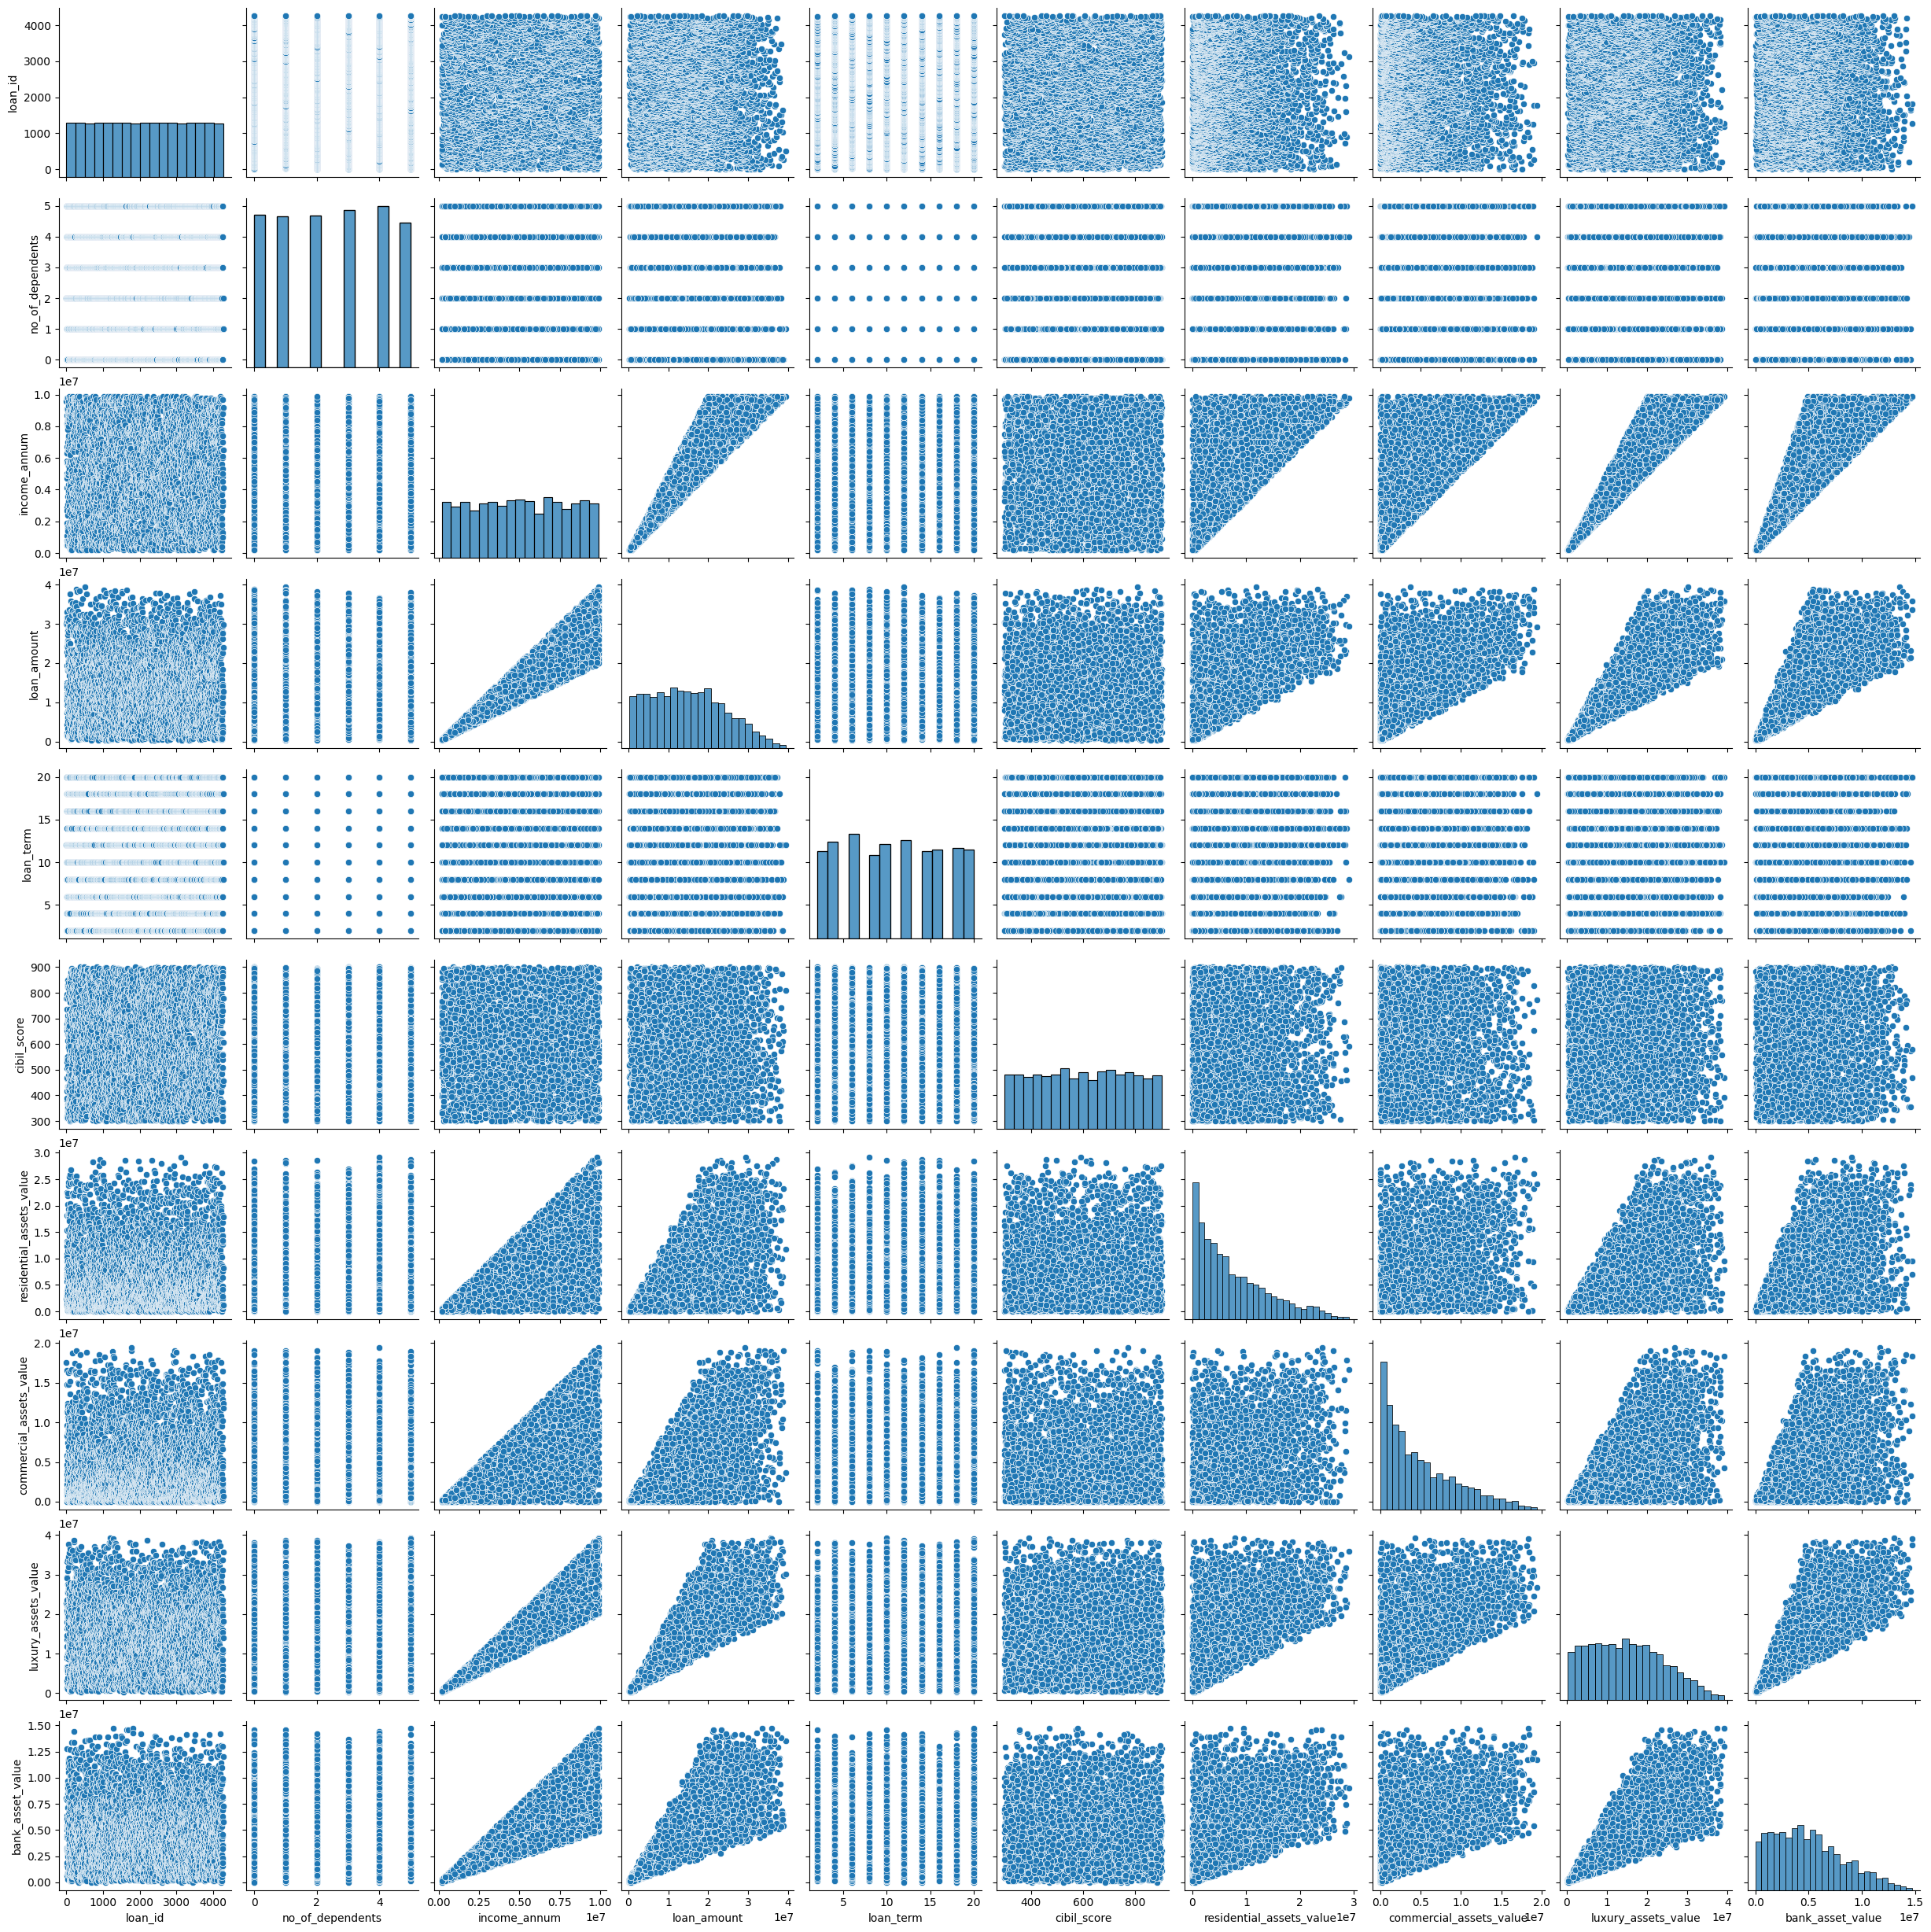

In [ ]:
sns.pairplot(df[num_cols])

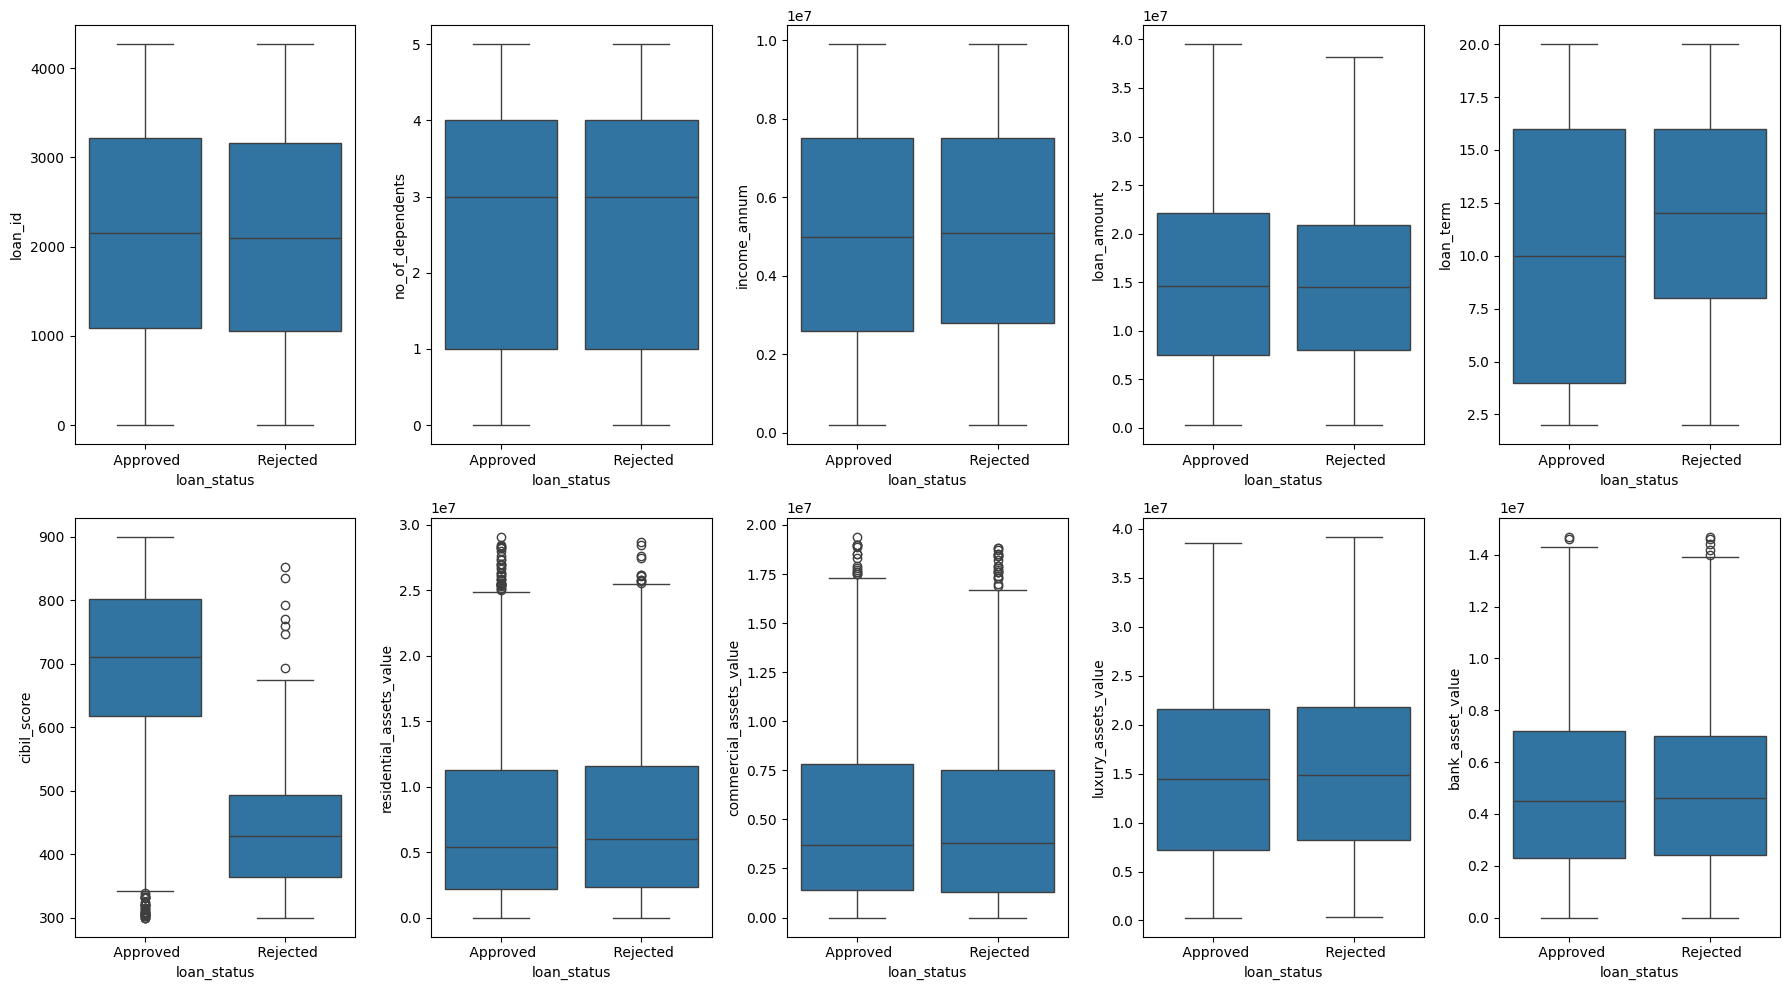

In [ ]:
## individual multi boxplot with target (Survived) - categorical with numeric

plt.figure(figsize = (18,10))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1)
    sns.boxplot(x = "loan_status", y = num_cols[i], data = df)
    plt.tight_layout()

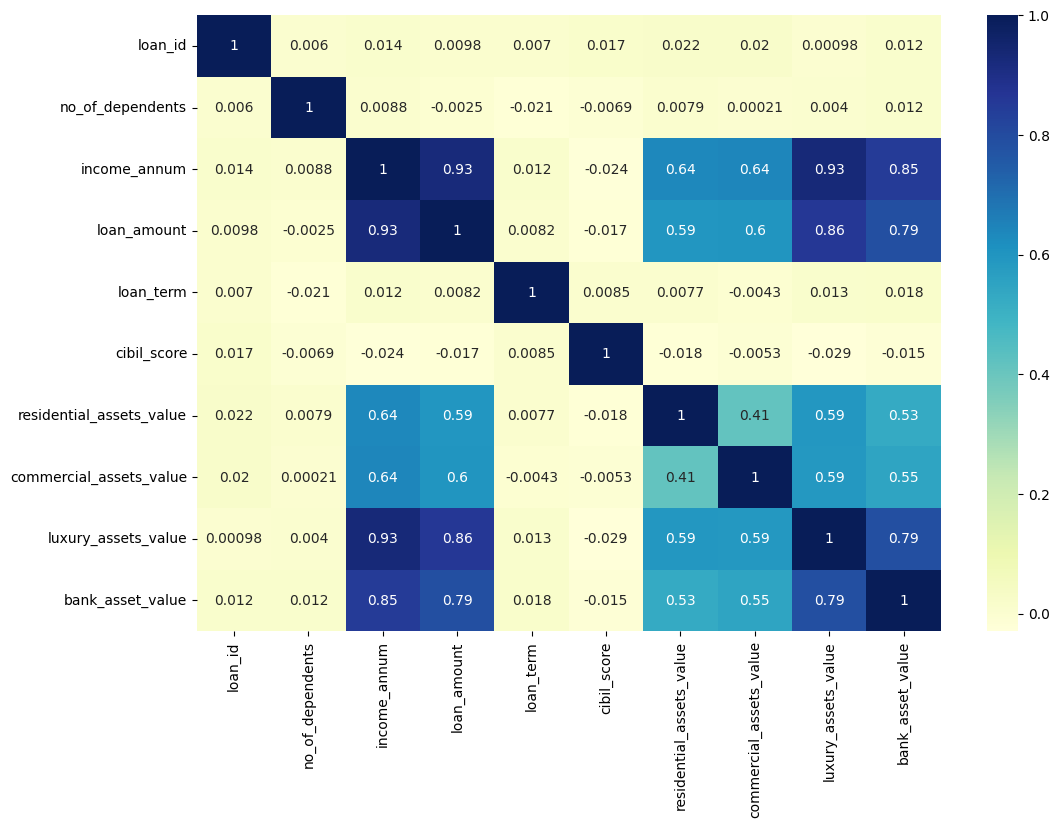

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot=True)

plt.show()

- Income_annum dan loan_amount punya korelasi sangat tinggi (0.93) → wajar, karena pinjaman biasanya menyesuaikan pendapatan.

- Income_annum juga sangat berkorelasi dengan luxury_assets_value (0.93) dan bank_asset_value (0.85) → semakin tinggi pendapatan, semakin besar asetnya.

- Loan_amount berkorelasi kuat dengan luxury_assets_value (0.86) dan bank_asset_value (0.79).

- Residential_assets_value dan commercial_assets_value punya korelasi sedang dengan income dan loan (~0.6).

- Loan_term, cibil_score, dan no_of_dependents tidak memiliki korelasi kuat dengan variabel lain (semua < 0.05).

# Additional Pre-processing

In [ ]:
print(df['loan_status'].unique())

[' Approved' ' Rejected']


In [ ]:
# mapping kolom target ke type data numerik terlebih dahulu
df['loan_status'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})

/tmp/ipython-input-1319350547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})


In [ ]:
df_final = pd.get_dummies(df)
df_final

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0           1                 2       9600000     29900000         12   
1           2                 0       4100000     12200000          8   
2           3                 3       9100000     29700000         20   
3           4                 3       8200000     30700000          8   
4           5                 5       9800000     24200000         20   
...       ...               ...           ...          ...        ...   
4264     4265                 5       1000000      2300000         12   
4265     4266                 0       3300000     11300000         20   
4266     4267                 2       6500000     23900000         18   
4267     4268                 1       4100000     12800000          8   
4268     4269                 1       9200000     29700000         10   

      cibil_score  residential_assets_value  commercial_assets_value  \
0             778                   2400000                 17600000   
1             417                   2700000                  2200000   
2             506                   7100000                  4500000   
3             467                  18200000                  3300000   
4             382                  12400000                  8200000   
...           ...                       ...                      ...   
4264          317                   2800000                   500000   
4265          559                   4200000                  2900000   
4266          457                   1200000                 12400000   
4267          780                   8200000                   700000   
4268          607                  17800000                 11800000   

      luxury_assets_value  bank_asset_value  loan_status  education_ Graduate  \
0                22700000           8000000            1                 True   
1                 8800000           3300000            0                False   
2                33300000          12800000            0                 True   
3                23300000           7900000            0                 True   
4                29400000           5000000            0                False   
...                   ...               ...          ...                  ...   
4264              3300000            800000            0                 True   
4265             11000000           1900000            1                False   
4266             18100000           7300000            0                False   
4267             14100000           5800000            1                False   
4268             35700000          12000000            1                 True   

      education_ Not Graduate  self_employed_ No  self_employed_ Yes  
0                       False               True               False  
1                        True              False                True  
2                       False               True               False  
3                       False               True               False  
4                        True              False                True  
...                       ...                ...                 ...  
4264                    False              False                True  
4265                     True              False                True  
4266                     True               True               False  
4267                     True               True               False  
4268                    False               True               False  

[4241 rows x 15 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4241 non-null   int64
 1   no_of_dependents          4241 non-null   int64
 2   income_annum              4241 non-null   int64
 3   loan_amount               4241 non-null   int64
 4   loan_term                 4241 non-null   int64
 5   cibil_score               4241 non-null   int64
 6   residential_assets_value  4241 non-null   int64
 7   commercial_assets_value   4241 non-null   int64
 8   luxury_assets_value       4241 non-null   int64
 9   bank_asset_value          4241 non-null   int64
 10  loan_status               4241 non-null   int64
 11  education_ Graduate       4241 non-null   bool 
 12  education_ Not Graduate   4241 non-null   bool 
 13  self_employed_ No         4241 non-null   bool 
 14  self_employed_ Yes        4241 non-null   boo

## Splitting Train Test

In [ ]:
y = df_final["loan_status"]
X = df_final.drop(columns = ["loan_status", "loan_id"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968, 13)
(1273, 13)
(2968,)
(1273,)


Handling Imbalance

In [ ]:
y_train.value_counts()

loan_status
1    1848
0    1120
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Fit & resample
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_smote.value_counts())

Sebelum SMOTE: loan_status
1    1848
0    1120
Name: count, dtype: int64
Sesudah SMOTE: loan_status
1    1848
0    1848
Name: count, dtype: int64


In [ ]:
X_smote

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       3500000     13300000          4          420   
1                    4       3500000     11300000         16          874   
2                    4       7800000     26800000          2          474   
3                    0       9500000     22600000          6          861   
4                    3       2300000      6800000         10          418   
...                ...           ...          ...        ...          ...   
3691                 2       3937407     10474814          9          328   
3692                 3       4405669     12028869         10          439   
3693                 1       4984847     16773336          7          467   
3694                 2       3579422     12039055          9          371   
3695                 1       2350840      8406724         16          442   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      6400000                  1700000              8000000   
1                      1400000                  3800000             10100000   
2                      8900000                 11200000             18400000   
3                     24700000                 13200000             29000000   
4                      2800000                  2700000              6300000   
...                        ...                      ...                  ...   
3691                   1525037                  5212667              7987481   
3692                   8908765                  7240208             10717530   
3693                  11602428                  4217581             19839388   
3694                   1599475                  2660157              9700000   
3695                   3993275                  2740754              7394956   

      bank_asset_value  education_ Graduate  education_ Not Graduate  \
0              2300000                False                     True   
1              3700000                False                     True   
2              5600000                False                     True   
3              5600000                 True                    False   
4              1400000                 True                    False   
...                ...                  ...                      ...   
3691           4862444                False                    False   
3692           4185565                False                     True   
3693           4901214                 True                    False   
3694           2559895                False                    False   
3695           2155883                False                    False   

      self_employed_ No  self_employed_ Yes  
0                 False                True  
1                 False                True  
2                 False                True  
3                  True               False  
4                  True               False  
...                 ...                 ...  
3691              False                True  
3692              False               False  
3693              False               False  
3694              False               False  
3695              False                True  

[3696 rows x 13 columns]

# Modelling dan Evaluation

## Logistic Reggression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()

# latih model
log_reg.fit(X_smote, y_smote)

# prediksi
y_pred = log_reg.predict(X_test)

# evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7211311861743912
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       481
           1       0.75      0.83      0.79       792

    accuracy                           0.72      1273
   macro avg       0.70      0.68      0.69      1273
weighted avg       0.71      0.72      0.71      1273



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Training
rf.fit(X_smote, y_smote)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9756480754124116

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       481
           1       0.99      0.97      0.98       792

    accuracy                           0.98      1273
   macro avg       0.97      0.98      0.97      1273
weighted avg       0.98      0.98      0.98      1273



## Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model XGBoost
xgb = XGBClassifier()

# Training model
xgb.fit(X_smote, y_smote)

# Prediksi
y_pred_xgb = xgb.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9866457187745483

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       481
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1273
   macro avg       0.98      0.99      0.99      1273
weighted avg       0.99      0.99      0.99      1273



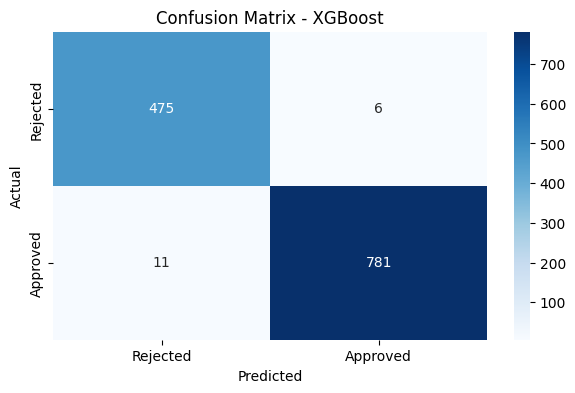

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Label custom
labels = ["Rejected", "Approved"]

# Plot confusion matrix
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


- Ada 475 orang yang memang seharusnya ditolak, dan model berhasil memprediksinya dengan benar.

- Ada 781 orang yang memang seharusnya disetujui, dan model juga memprediksinya dengan benar.

- Ada 6 orang yang sebenarnya harus ditolak, tapi model memprediksi disetujui.

- Ada 11 orang yang seharusnya disetujui, tapi model memprediksi ditolak.

In [ ]:
# ROC AUC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred_xgb)
print("AUC Score:", auc)

AUC Score: 0.9868185493185493


In [ ]:
# Crosss Validation

from sklearn.model_selection import cross_val_score

# cross-validation 5-fold, pakai metric 'accuracy'
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')

print("Accuracy tiap fold:", scores)
print("Rata-rata accuracy:", np.mean(scores))

Accuracy tiap fold: [0.98351001 0.98349057 0.98584906 0.98231132 0.98466981]
Rata-rata accuracy: 0.9839661532991089


# Evaluation (DS Metrics)

Kesimpulan pada Evaluation (DS Metrics)
:
- Precision, recall, dan f1-score untuk kedua kelas ("Rejected" dan "Approval") berada di kisaran 0.98–0.99. model mampu memprediksi dengan akurat baik peminjam yang layak disetujui maupun yang harus ditolak.
- Akurasi Keseluruhan Baik -> Accuracy = 0.99
- AUC = 0.9868, mendekati 1.0 → artinya model memiliki kemampuan yang sangat baik dalam membedakan antara kelas "Approval" dan "Rejected".
- Stabil di Cross-Validation, Akurasi tiap fold konsisten di sekitar 0.982 – 0.986, dengan rata-rata 0.984. menunjukkan model stabil dan tidak overfitting pada fold tertentu.

# Bussiness Impact

Business Impact yang dapat diambil

1. Mengurangi Risiko Kredit Bermasalah , Dengan recall tinggi pada kelas Rejected (0), perusahaan bisa lebih tepat menolak nasabah berisiko tinggi. Dampaknya: penurunan potensi kredit macet

2. Meningkatkan Pendapatan/Nasabah , Dengan precision tinggi pada kelas Approval (1), mayoritas nasabah yang disetujui benar-benar layak. Dampaknya: lebih banyak pinjaman aman yang menghasilkan bunga, meningkatkan profit perusahaan.

3. Efisiensi Operasional, Proses manual dalam menilai kelayakan pinjaman bisa berkurang karena model memberikan prediksi cepat & akurat. Dampaknya: penghematan waktu dan biaya operasional bagi tim analisis kredit.

# Conclusion

Model `XGBoost` yang digunakan pada prediksi loan approval menunjukkan performa yang sangat baik dengan akurasi 99%, AUC 0.986, serta precision dan recall yang tinggi pada kedua kelas. Hasil ini membuktikan bahwa XGBoost mampu secara konsisten membedakan pemohon layak dan tidak layak dengan performa yang baik dan stabil.

Dari sisi bisnis, penerapan model ini berpotensi besar membantu perusahaan menekan risiko kredit macet, meningkatkan profitabilitas melalui persetujuan pinjaman yang tepat, serta mempercepat proses analisis.

Dengan demikian, model XGBoost siap diimplementasikan pada real data dengan tetap dilakukan pemantauan performa model secara berkala.

# Deployment

In [ ]:
# Save Model

import joblib

# simpan model
joblib.dump(xgb, "/content/drive/MyDrive/Final-Project-Bootcamp-DS/loan_approval_model.pkl")

['/content/drive/MyDrive/Final-Project-Bootcamp-DS/loan_approval_model.pkl']

Model hasil training ini telah disimpan dalam file `loan_approval_model.pkl` dan digunakan pada aplikasi website sederhana yang dapat diakses melalui Streamlit Cloud:
👉 [Loan Approval Prediction App](https://loan-approval-prediction-app-by-faldo.streamlit.app)

---